In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from plt_utils import plt_imgshow

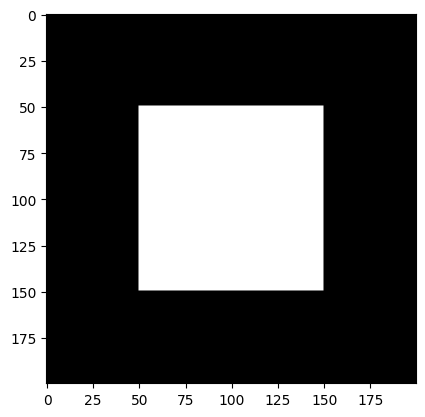

In [3]:
img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255
plt_imgshow(img)

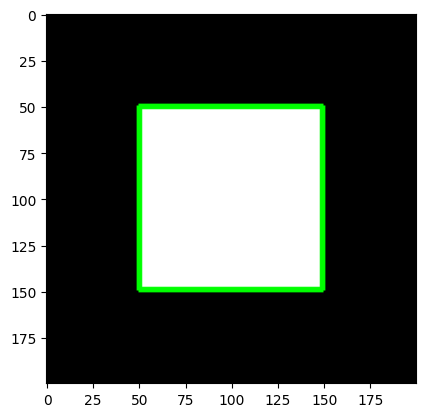

In [4]:
ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0, 255, 0), 2)
plt_imgshow(img)

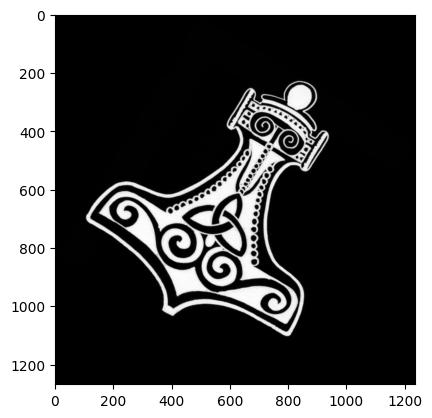

In [8]:
img = cv2.imread('../images/hammer.jpg', cv2.IMREAD_UNCHANGED)
plt_imgshow(img)

In [10]:
img_pyr = cv2.pyrDown(img)
ret, img_thresh = cv2.threshold(cv2.cvtColor(img_pyr, cv2.COLOR_BGR2GRAY),
                                127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

针对每个轮廓寻找并画出边框、最小外接矩形和最小外接圆

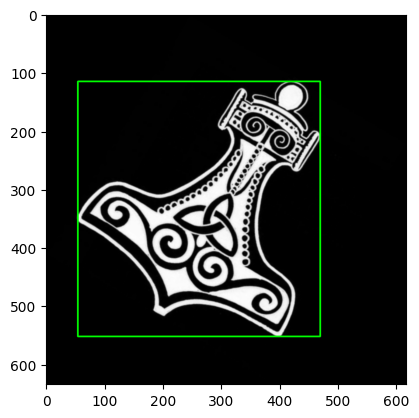

In [11]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_pyr, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt_imgshow(img_pyr)

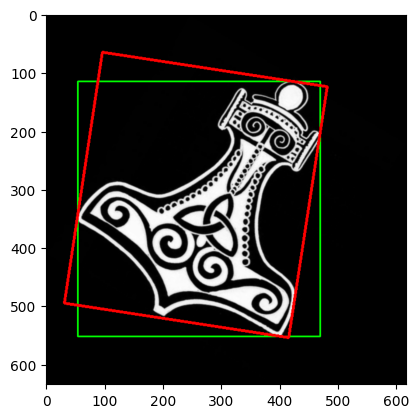

In [13]:
for c in contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(img_pyr, [box], 0, (0, 0, 255), 3)

plt_imgshow(img_pyr)

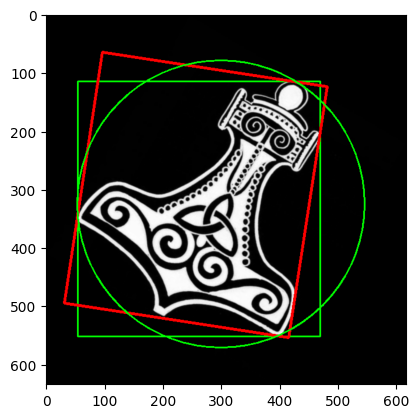

In [15]:
for c in contours:
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_pyr, center, radius, (0, 255, 0), 2)

plt_imgshow(img_pyr)

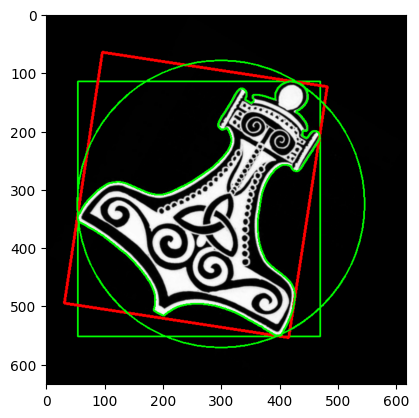

In [20]:
cv2.drawContours(img_pyr, contours, -1, (0, 255, 0), 2)
plt_imgshow(img_pyr)

图轮廓

In [21]:
img = cv2.pyrDown(cv2.imread('../images/hammer.jpg', cv2.IMREAD_UNCHANGED))
ret, thresh = cv2. threshold (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                              127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

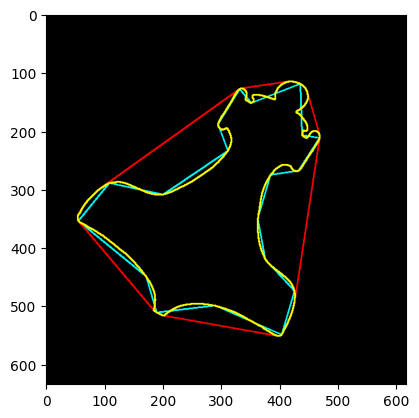

In [26]:
black = np.zeros_like(img)
for c in contours:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    hull = cv2.convexHull(c)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
    cv2.drawContours(black, contours, -1, (0, 255, 255), 2)
plt_imgshow(black)